# DLProfile Example using FRNN

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.parent.parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [6]:
#import shutil
#shutil.rmtree('/tmp/temp_analysis')

In [7]:
DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/benchmark/frnn/frnn_run1_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 120302 of 120302 Parsing DXT File 
[============================================================] 100.0% 88093 of 88093 Parsing Darshan File 
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [8]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/projects/datascience/dhari/dlio_datasets/frnn/img_18390_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_4529_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_25861_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_17966_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_708_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_16649_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_16040_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_25717_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_11128_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_8785_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_26007_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_5622_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_9646_of_28000.npz',
 '/projects/

In [9]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].unique().tolist())

'Files used in the application'
['/projects/datascience/dhari/dlio_datasets/frnn/img_12225_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_11290_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_18345_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_14107_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_26941_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_26417_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_11950_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_5429_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_1666_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_4726_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_14819_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_12422_of_28000.npz',
 '/projects/datascience/dhari/dlio_datasets/frnn/img_11957_of_28000.npz',
 '/projec

### Collect the summary of the Application

In [10]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	1824.00 seconds
Time spent in I/O		:	94.00 seconds
% Time spent in I/O		:	5.15%
Total Data Accessed		:	153.98 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read']
# of files used			:	994
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	0 bytes and 4194304 bytes
	Average			:	2310219 bytes
	Median			:	4014570 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	0 B/s and 3077 MB/s
	Average			:	524 MB/s
	Median			:	97 MB/s
Access Pattern:
	Sequential		:	55.56%
	Consecutive		:	44.44%


Files Summary:
File Types			:	['npz']
Dataset Size:
	Total			:	15.365 GB
	Min,Max			:	0.015 GB and 0.015 GB
	Average			:	0.015 GB


In [11]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 1824.0 seconds'


In [12]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 94.00273749995966 seconds'


### I/O time spent on each file

In [13]:
for file in df_normal['Filename'].unique()[:8]:
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /projects/datascience/dhari/dlio_datasets/frnn/img_12225_of_28000.npz: 0.06 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/frnn/img_11290_of_28000.npz: 0.09 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/frnn/img_18345_of_28000.npz: 0.09 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/frnn/img_14107_of_28000.npz: 0.11 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/frnn/img_26941_of_28000.npz: 0.08 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/frnn/img_26417_of_28000.npz: 0.10 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/frnn/img_11950_of_28000.npz: 0.09 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/frnn/img_5429_of_28000.npz: 0.05 seconds


### I/O Time spent per rank

In [14]:
for rank in df['Rank'].unique()[:8]:
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 93.56 seconds
I/O time for rank 1: 94.30 seconds
I/O time for rank 2: 93.49 seconds
I/O time for rank 3: 93.92 seconds
I/O time for rank 4: 94.41 seconds
I/O time for rank 5: 94.17 seconds
I/O time for rank 6: 93.86 seconds
I/O time for rank 7: 94.30 seconds


In [15]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 153.98 GB'

### I/O performed on each file

In [16]:
for file in df['Filename'].unique()[:8]:
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /projects/datascience/dhari/dlio_datasets/frnn/img_18390_of_28000.npz: 158.63 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/frnn/img_4529_of_28000.npz: 158.63 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/frnn/img_25861_of_28000.npz: 158.63 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/frnn/img_17966_of_28000.npz: 158.63 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/frnn/img_708_of_28000.npz: 158.63 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/frnn/img_16649_of_28000.npz: 158.63 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/frnn/img_16040_of_28000.npz: 158.63 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/frnn/img_25717_of_28000.npz: 158.63 MB


In [17]:
for rank in df['Rank'].unique()[:8]:
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 19709.80 MB
I/O performed by rank 1: 19709.80 MB
I/O performed by rank 2: 19709.80 MB
I/O performed by rank 3: 19709.80 MB
I/O performed by rank 4: 19709.80 MB
I/O performed by rank 5: 19709.80 MB
I/O performed by rank 6: 19709.80 MB
I/O performed by rank 7: 19709.80 MB


In [18]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'img_10026_of_28000': 16597482.0,
 'img_10046_of_28000': 16597482.0,
 'img_10067_of_28000': 16597482.0,
 'img_10069_of_28000': 16597482.0,
 'img_1007_of_28000': 16597482.0,
 'img_10091_of_28000': 16597482.0,
 'img_10132_of_28000': 16597482.0,
 'img_10179_of_28000': 16597482.0,
 'img_10224_of_28000': 16597482.0,
 'img_10229_of_28000': 16597482.0,
 'img_1025_of_28000': 16597482.0,
 'img_10268_of_28000': 16597482.0,
 'img_102_of_28000': 16597482.0,
 'img_10352_of_28000': 16597482.0,
 'img_10383_of_28000': 16597482.0,
 'img_1040_of_28000': 16597482.0,
 'img_1041_of_28000': 16597482.0,
 'img_10436_of_28000': 16597482.0,
 'img_10445_of_28000': 16597482.0,
 'img_10460_of_28000': 16597482.0,
 'img_10466_of_28000': 16597482.0,
 'img_10470_of_28000': 16597482.0,
 'img_10481_of_28000': 16597482.0,
 'img_10498_of_28000': 16597482.0,
 'img_10510_of_28000': 16597482.0,
 'img_1051_of_28000': 16597482.0,
 'img_10536_of_28000': 16597482.0,
 'img_10575_of_28000': 16597482.0,
 'i

 'img_18289_of_28000': 16597482.0,
 'img_18318_of_28000': 16597482.0,
 'img_18325_of_28000': 16597482.0,
 'img_18345_of_28000': 16597482.0,
 'img_18390_of_28000': 16597482.0,
 'img_18396_of_28000': 16597482.0,
 'img_18431_of_28000': 16597482.0,
 'img_18437_of_28000': 16597482.0,
 'img_18470_of_28000': 16597482.0,
 'img_18474_of_28000': 16597482.0,
 'img_18484_of_28000': 16597482.0,
 'img_18537_of_28000': 16597482.0,
 'img_18544_of_28000': 16597482.0,
 'img_18635_of_28000': 16597482.0,
 'img_18643_of_28000': 16597482.0,
 'img_18666_of_28000': 16597482.0,
 'img_18680_of_28000': 16597482.0,
 'img_18721_of_28000': 16597482.0,
 'img_18763_of_28000': 16597482.0,
 'img_18775_of_28000': 16597482.0,
 'img_18779_of_28000': 16597482.0,
 'img_18801_of_28000': 16597482.0,
 'img_18840_of_28000': 16597482.0,
 'img_18849_of_28000': 16597482.0,
 'img_18887_of_28000': 16597482.0,
 'img_1889_of_28000': 16597482.0,
 'img_18965_of_28000': 16597482.0,
 'img_1901_of_28000': 16597482.0,
 'img_19038_of_28000':

 'img_4848_of_28000': 16597482.0,
 'img_486_of_28000': 16597482.0,
 'img_4875_of_28000': 16597482.0,
 'img_4911_of_28000': 16597482.0,
 'img_4974_of_28000': 16597482.0,
 'img_5001_of_28000': 16597482.0,
 'img_5029_of_28000': 16597482.0,
 'img_5041_of_28000': 16597482.0,
 'img_5063_of_28000': 16597482.0,
 'img_5098_of_28000': 16597482.0,
 'img_5114_of_28000': 16597482.0,
 'img_5211_of_28000': 16597482.0,
 'img_5231_of_28000': 16597482.0,
 'img_5262_of_28000': 16597482.0,
 'img_5288_of_28000': 16597482.0,
 'img_5326_of_28000': 16597482.0,
 'img_533_of_28000': 16597482.0,
 'img_5379_of_28000': 16597482.0,
 'img_5397_of_28000': 16597482.0,
 'img_5409_of_28000': 16597482.0,
 'img_5429_of_28000': 16597482.0,
 'img_5508_of_28000': 16597482.0,
 'img_5520_of_28000': 16597482.0,
 'img_5551_of_28000': 16597482.0,
 'img_5587_of_28000': 16597482.0,
 'img_5588_of_28000': 16597482.0,
 'img_5604_of_28000': 16597482.0,
 'img_5622_of_28000': 16597482.0,
 'img_568_of_28000': 16597482.0,
 'img_5693_of_280

### How application access data over time.

[============================================================] 100.0% 71568 of 71568 Creating Timeline 


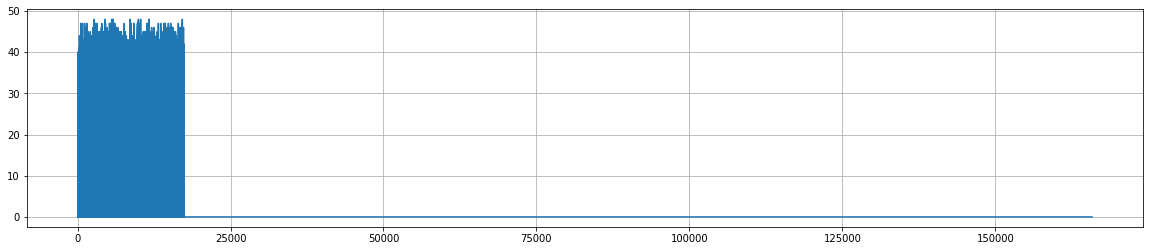

In [19]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tl['time_step'], tl['operation_count']);

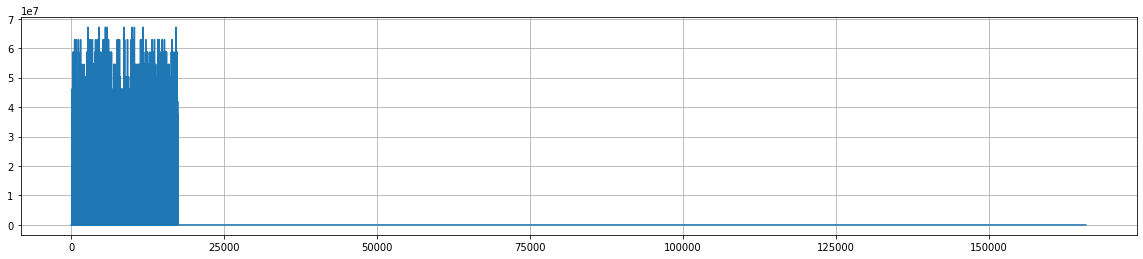

In [20]:
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

[============================================================] 100.0% 72 of 72 Creating Timeline 


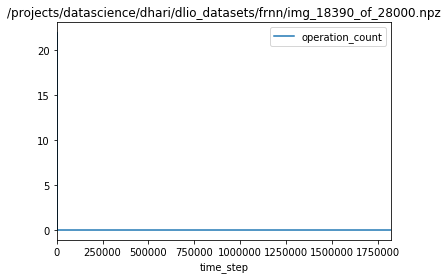

[============================================================] 100.0% 72 of 72 Creating Timeline 


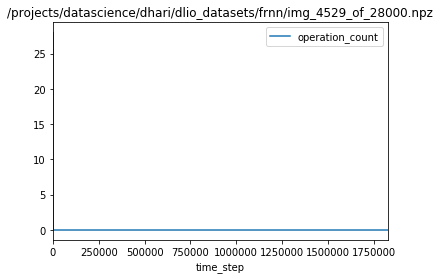

[============================================================] 100.0% 72 of 72 Creating Timeline 


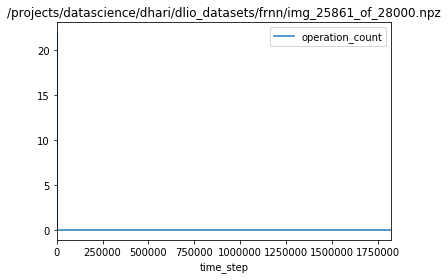

[============================================================] 100.0% 72 of 72 Creating Timeline 


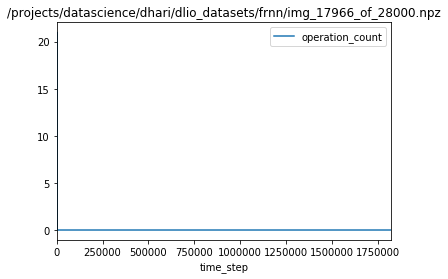

[============================================================] 100.0% 72 of 72 Creating Timeline 


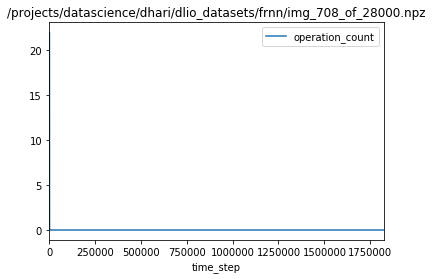

[============================================================] 100.0% 72 of 72 Creating Timeline 


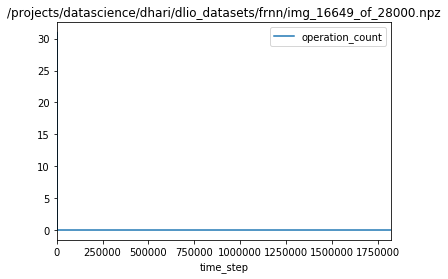

[============================================================] 100.0% 72 of 72 Creating Timeline 


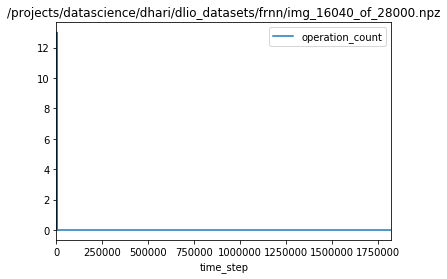

[============================================================] 100.0% 72 of 72 Creating Timeline 


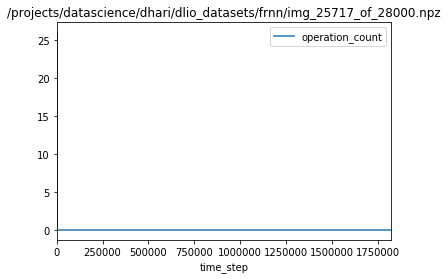

[============================================================] 100.0% 72 of 72 Creating Timeline 


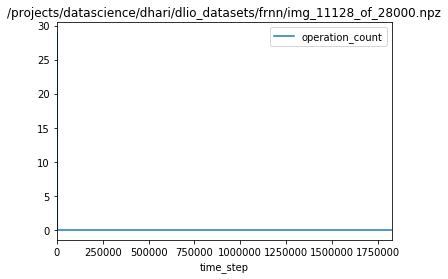

[============================================================] 100.0% 72 of 72 Creating Timeline 


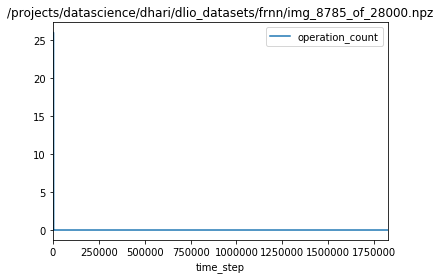

[============================================================] 100.0% 72 of 72 Creating Timeline 


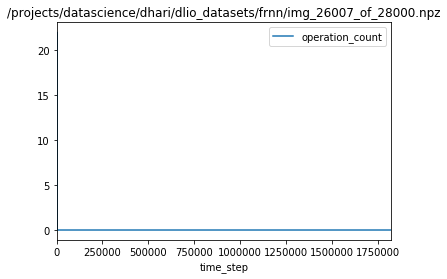

[============================================================] 100.0% 72 of 72 Creating Timeline 


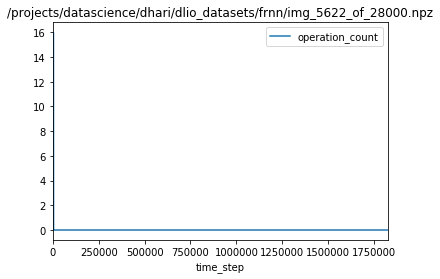

[============================================================] 100.0% 72 of 72 Creating Timeline 


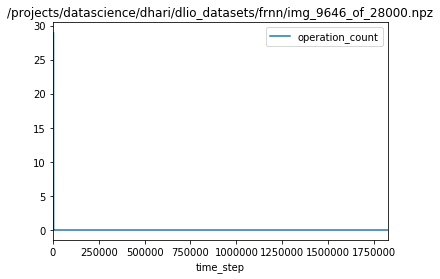

[============================================================] 100.0% 72 of 72 Creating Timeline 


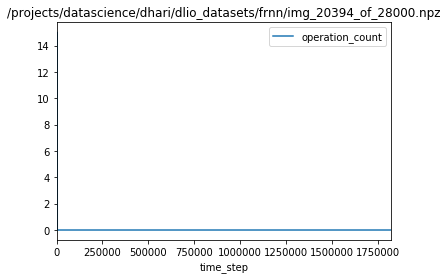

[============================================================] 100.0% 72 of 72 Creating Timeline 


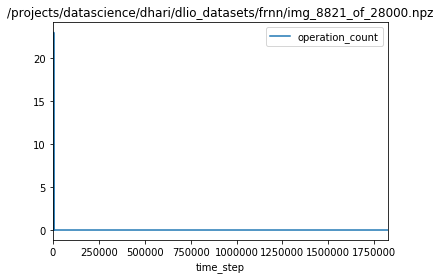

[============================================================] 100.0% 72 of 72 Creating Timeline 


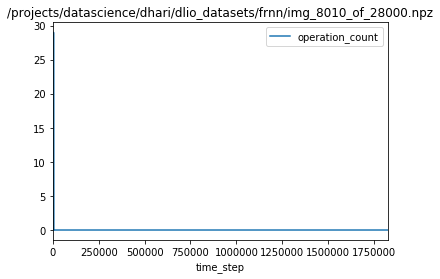

[============================================================] 100.0% 72 of 72 Creating Timeline 


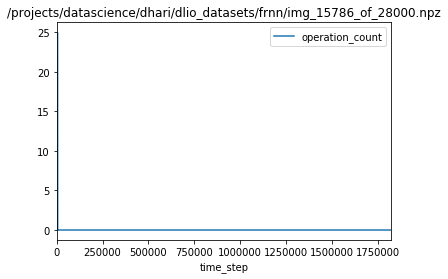

[============================================================] 100.0% 72 of 72 Creating Timeline 


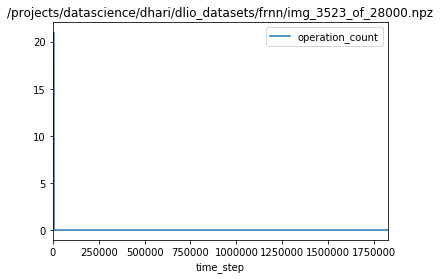

[============================================================] 100.0% 72 of 72 Creating Timeline 


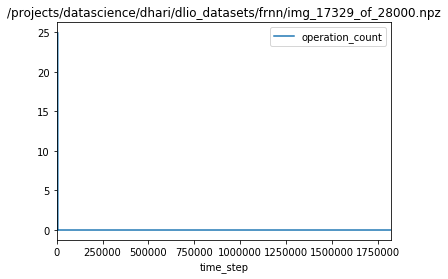

[============================================================] 100.0% 72 of 72 Creating Timeline 


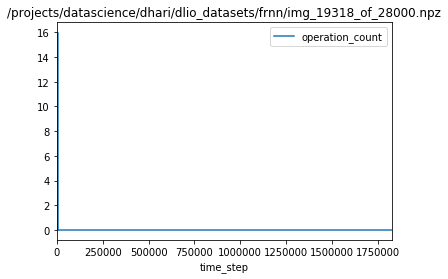

In [21]:
for file in df['Filename'].unique()[:20]:
    tl = profile.CreateIOTimeline(filepath=file,time_step=0.001)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 8946 of 8946 Creating Timeline 


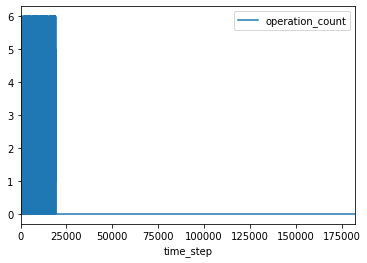

[============================================================] 100.0% 8946 of 8946 Creating Timeline 


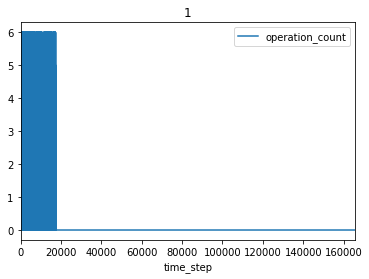

[============================================================] 100.0% 8946 of 8946 Creating Timeline 


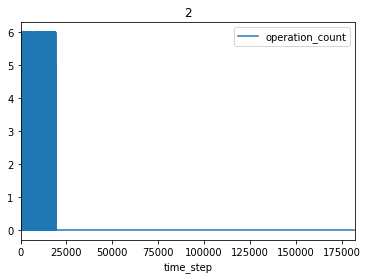

[============================================================] 100.0% 8946 of 8946 Creating Timeline 


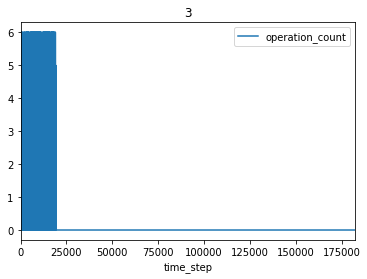

[============================================================] 100.0% 8946 of 8946 Creating Timeline 


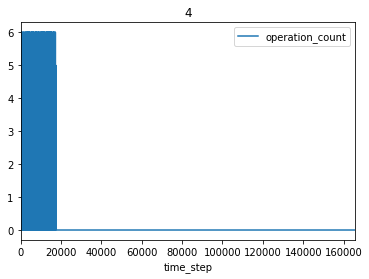

[============================================================] 100.0% 8946 of 8946 Creating Timeline 


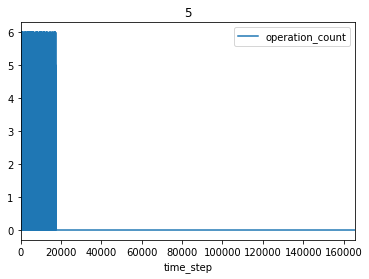

[============================================================] 100.0% 8946 of 8946 Creating Timeline 


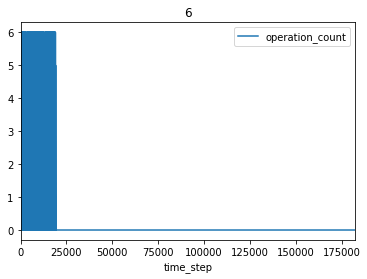

[============================================================] 100.0% 8946 of 8946 Creating Timeline 


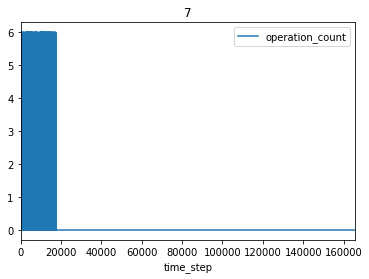

In [22]:
for rank in df['Rank'].unique()[:8]:
    tl = profile.CreateIOTimeline(rank=rank)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

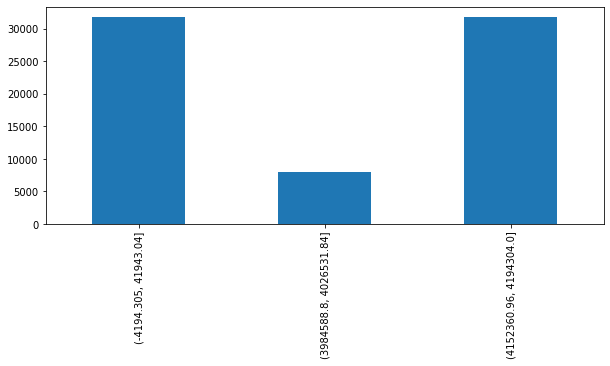

In [23]:
request_df = profile.GetIORequestDistribution(bins=100)
request_df.plot(kind='bar', figsize=(10, 4));

### Data Transfer Size distribution for each file.

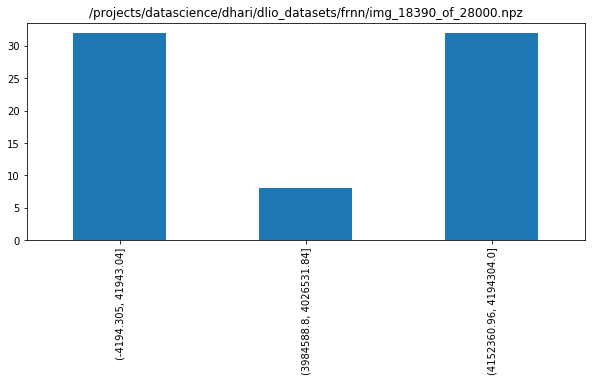

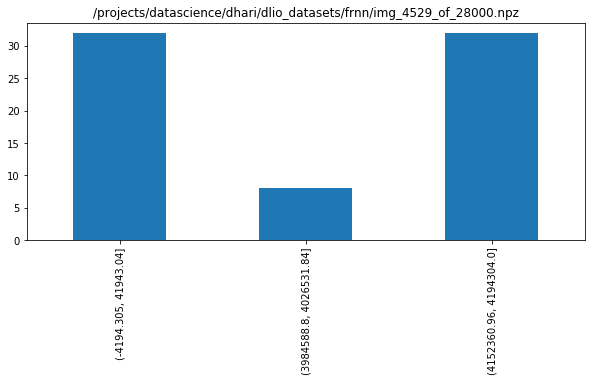

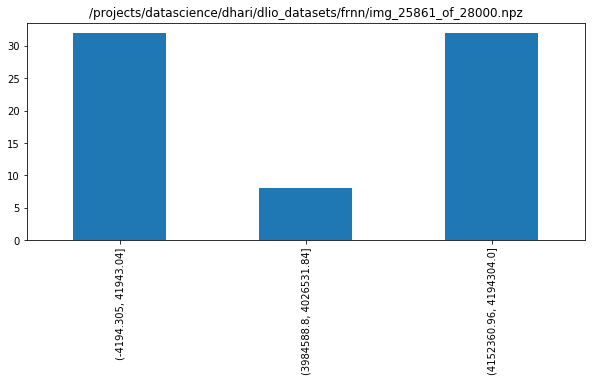

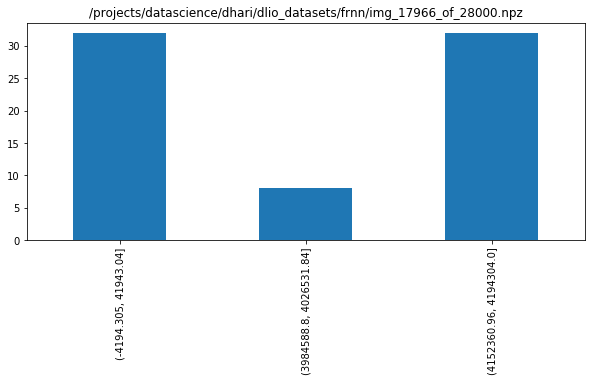

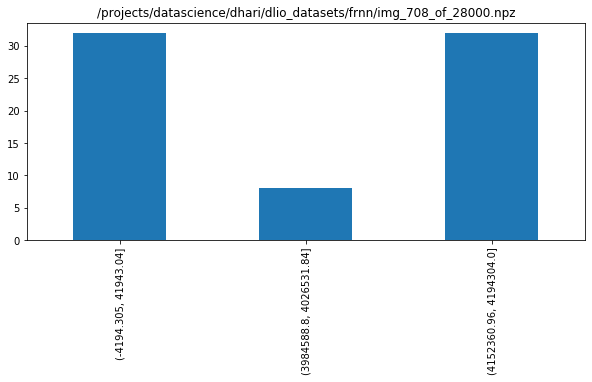

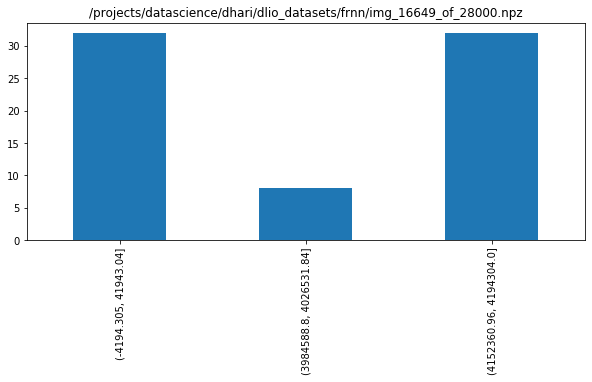

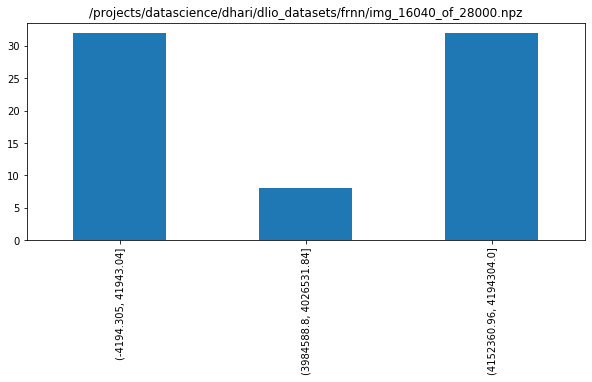

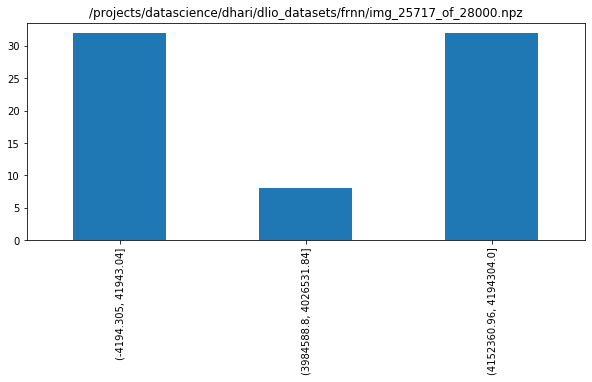

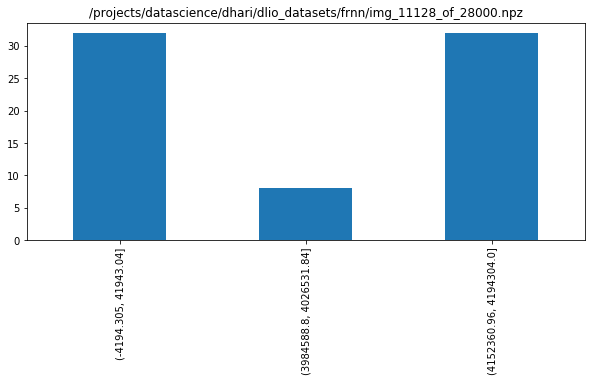

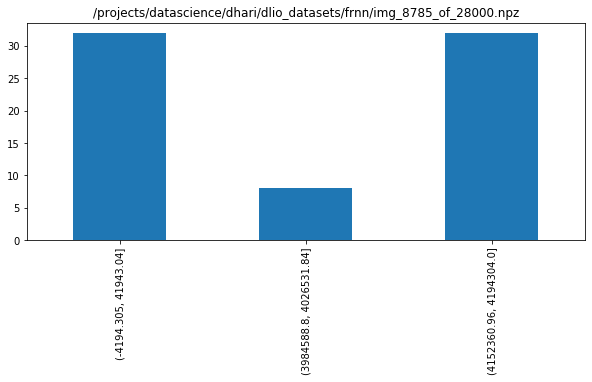

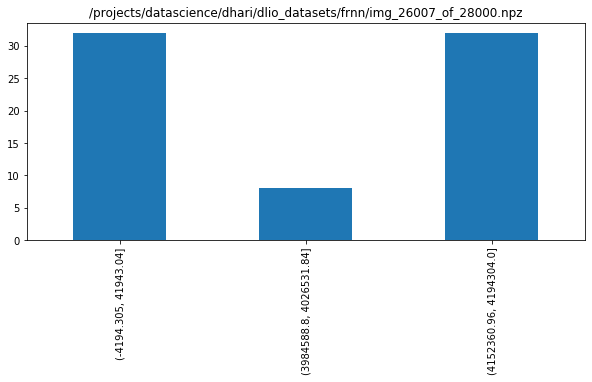

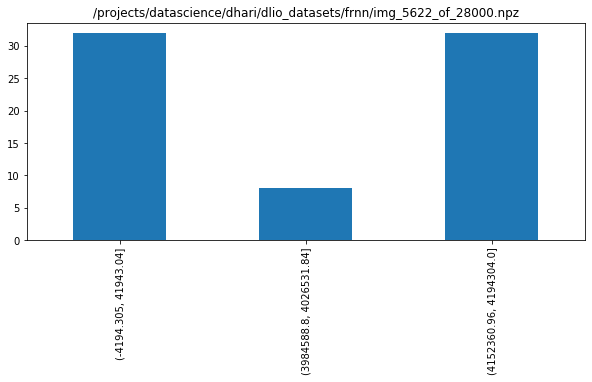

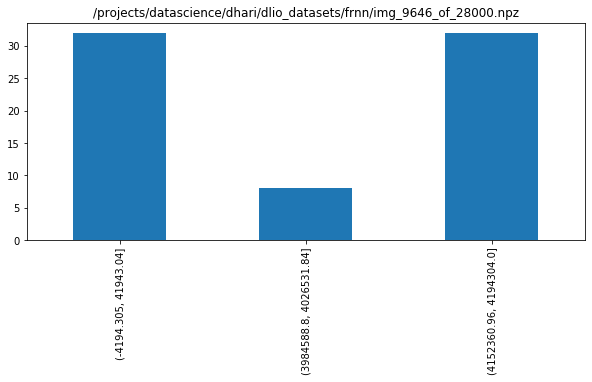

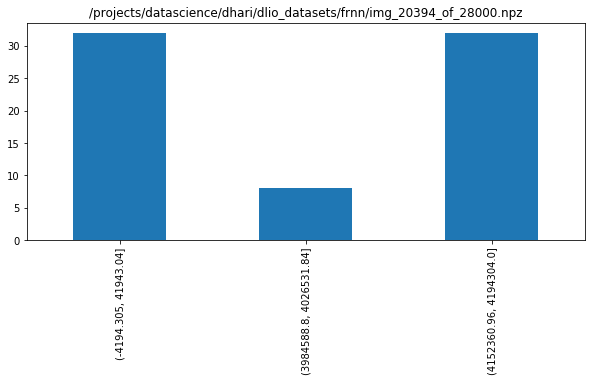

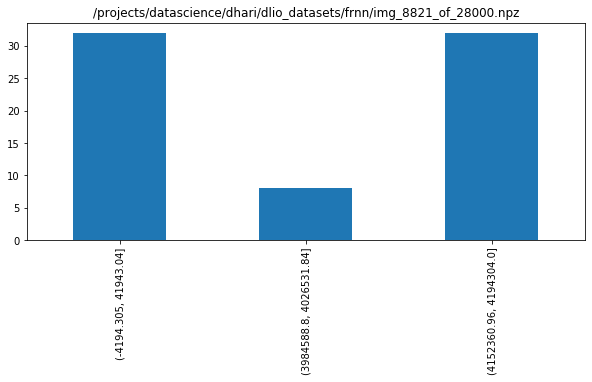

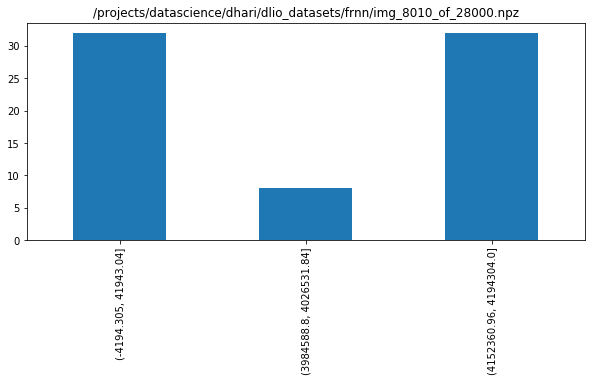

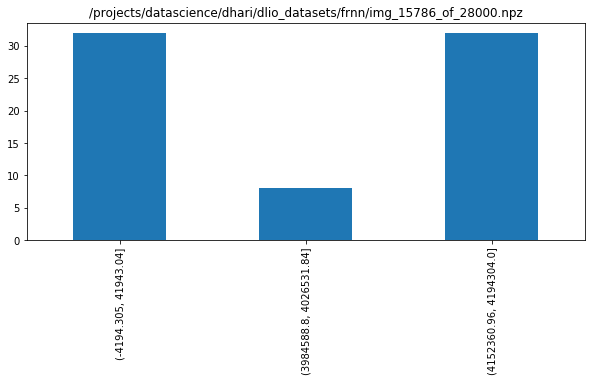

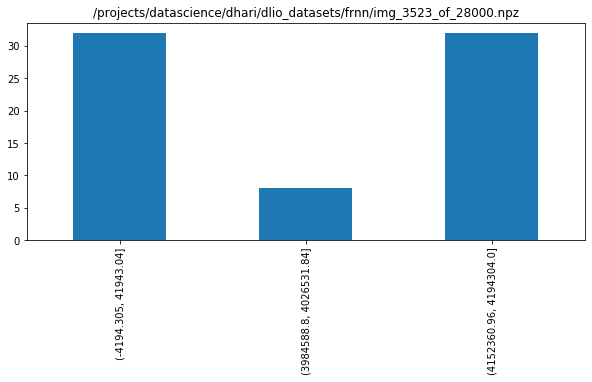

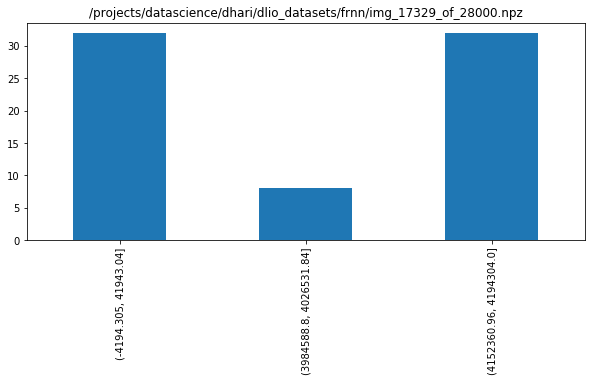

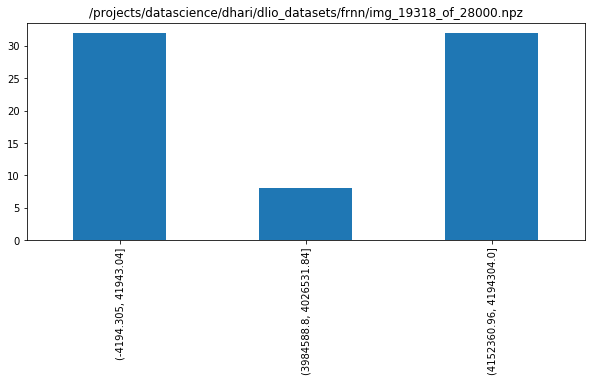

In [24]:
for file in df['Filename'].unique()[:20]:
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

### Data Transfer Sizes per Rank

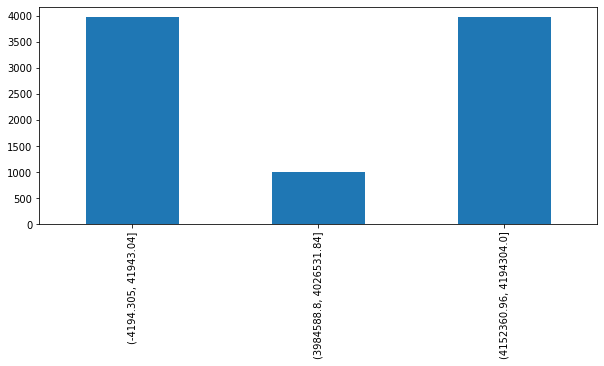

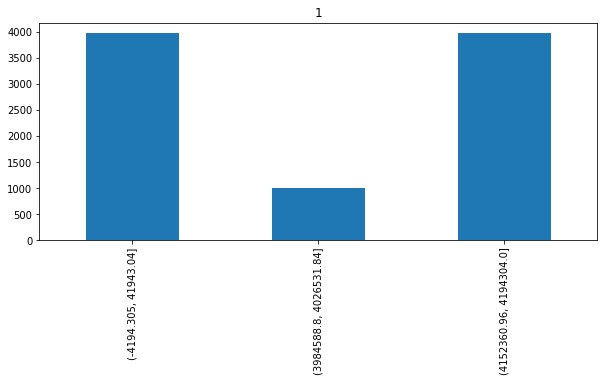

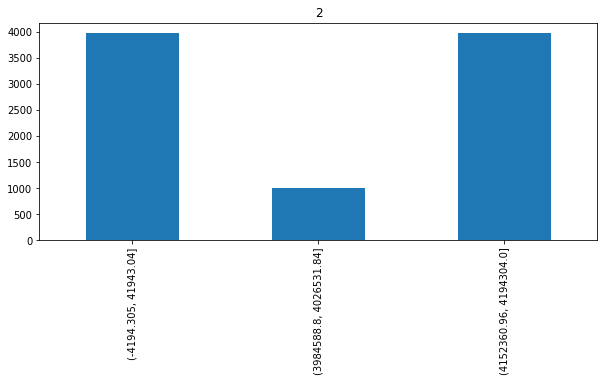

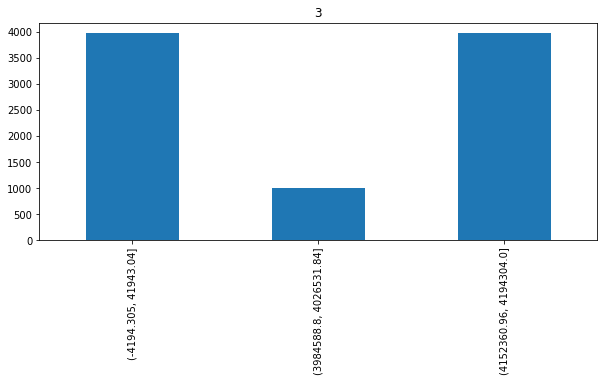

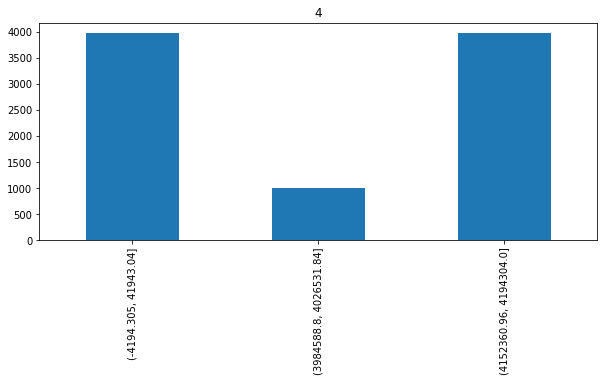

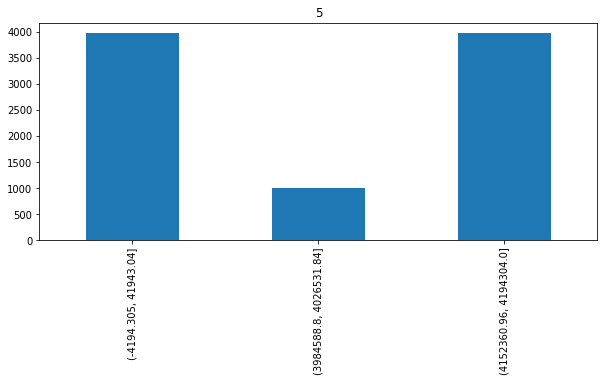

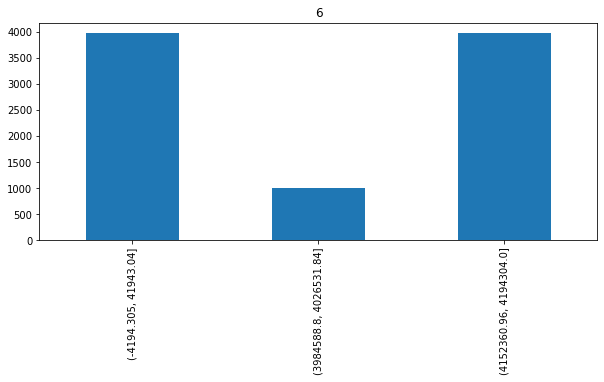

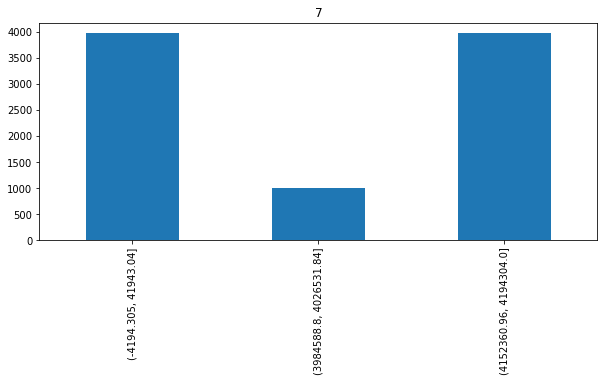

In [25]:
for rank in df['Rank'].unique()[:8]:
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [26]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique()[:8]:
    if os.path.exists(file):
        pp.pprint(profile.GetFileSummary(file))

{'ext': 'npz',
 'filename': 'img_18390_of_28000',
 'io_size': 166335792,
 'io_time': 0.08176250000000002,
 'path': '/projects/datascience/dhari/dlio_datasets/frnn/img_18390_of_28000.npz',
 'size': 16597482,
 'special': {}}
{'ext': 'npz',
 'filename': 'img_4529_of_28000',
 'io_size': 166335792,
 'io_time': 0.13991249999999988,
 'path': '/projects/datascience/dhari/dlio_datasets/frnn/img_4529_of_28000.npz',
 'size': 16597482,
 'special': {}}
{'ext': 'npz',
 'filename': 'img_25861_of_28000',
 'io_size': 166335792,
 'io_time': 0.07022499999999997,
 'path': '/projects/datascience/dhari/dlio_datasets/frnn/img_25861_of_28000.npz',
 'size': 16597482,
 'special': {}}
{'ext': 'npz',
 'filename': 'img_17966_of_28000',
 'io_size': 166335792,
 'io_time': 0.11060000000000002,
 'path': '/projects/datascience/dhari/dlio_datasets/frnn/img_17966_of_28000.npz',
 'size': 16597482,
 'special': {}}
{'ext': 'npz',
 'filename': 'img_708_of_28000',
 'io_size': 166335792,
 'io_time': 0.09106249999999987,
 'path